<a href="https://colab.research.google.com/github/SummerProjectTEAM-10/sample/blob/LOGESHWARAN/Predict_whether_a_person_will_have_diabetes_or_not_using_KNN_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries used here were pandas, numpy, and matplotlib**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Reading dataset**

In [ ]:
dataframe = pd.read_csv('dataset/diabetes dataset.csv')

In [ ]:
# printing the first 5 rows of the dataset
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# printing the dimensions of the diabetes datset
print("dimension of diabetes data: {}".format(dataframe.shape))

dimension of diabetes data: (768, 9)


In [ ]:
# grouping the dataset by Outcome, to see which category has how many enteries
print(dataframe.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# The dataset has many Nan values, so we need to process it before analysing
dataframe_clean = dataframe.copy(deep = True)
dataframe_clean[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataframe_clean[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(dataframe_clean.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Statistical Representation of Data**

In [ ]:

# with Nan Values
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# without Nan Values
dataframe_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_df =  pd.DataFrame(sc_x.fit_transform(dataframe.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
x_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
y_df = dataframe_clean.Outcome

**Converting Pandas dataframe to Numpy arrays**

In [ ]:
# Dividing dataset into x_value: input fields, y_value: output_fields
x_value = x_df.values
y_value = y_df.values

In [ ]:
# printing dimensions of the both the arrays
print(x_value.shape)
print(y_value.shape)

(768, 8)
(768,)


**Dividing dataset to Train and Test dataset**

In [ ]:
# defining a margin variable which would split the dataset, 80% for Training and 20% for Testing 
margin = x_value.shape[0]
print(int (margin*80/100))

614


In [ ]:
# x_train: training data for x values
x_train = x_value[:614,]
x_train.shape

(614, 8)

In [ ]:
# y_train: training data for y values
y_train = y_value[:614,]
y_train.shape

(614,)

In [ ]:
# x_test: testing data for x values
x_test = x_value[614:,]
x_test.shape

(154, 8)

In [ ]:
# y_test: testing data for y values
y_test = y_value[614:,]
y_test.shape

(154,)

**KNN ALGORITHM**

In [ ]:
# calculating euclidean distance

def distance(pt1, pt2):
    dist =  pt1 - pt2
    dist = dist**2
    dist = sum(dist)
    dist = np.sqrt(dist)
    
    return dist  
def knn(x,y,query_point,k = int(np.sqrt(x_test.shape[0]))):
    distance_array = []
    total_points = x.shape[0]
# calculating distance of the query point from all the points in xdata
    for i in range(total_points):
        d = distance(x[i],query_point)
        distance_array.append((d,y[i]))
# sorting the arrays, such that the we get the least distance is at priority (ascending order)
    sorted_distance_array = sorted(distance_array)
    
    k_distance_array = sorted_distance_array[:k]
    
    k_distance_array = np.array(k_distance_array, dtype = "object")
    
    #counting the max occurrences of the data in the output k_distance_array 
    final = np.unique(k_distance_array[:,1], return_counts = True)
    
    #calculating the index of the class with max occurence and hence making prediction
    index = final[1].argmax()
    prediction = final[0][index]
    return prediction

**Making predictions and saving results in a csv file**

In [ ]:
with open('result.csv','w+',encoding = 'utf - 8') as f:
    f.write('Outcome \n')
    for idx in range(x_test.shape[0]):
        prediction = knn(x_train,y_train,x_test[idx])
        string = str(prediction) + '\n'
        f.write(string)

In [ ]:
# creating y_pred array for saving predicted results
y_pred_df = pd.read_csv('result.csv')
y_pred = y_pred_df.values
print(y_pred)

[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]


**MODEL EVALUATION**


**ACCURACY SCORE**

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7337662337662337

In [ ]:
print("Accuracy of our KNN Algorithm is: " + str(accuracy*100) + "%")

Accuracy of our KNN Algorithm is: 73.37662337662337%


**PRECISION SCORE**

In [ ]:
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred)
print("Precision Score is ",precision)

Precision Score is  0.75


**RECALL SCORE**

In [ ]:
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
print("Recall Score: ",recall)

Recall Score:  0.38181818181818183


**F1 SCORE**

In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred)
print("F1 Score is ",f1)

F1 Score is  0.5060240963855421


**CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import classification_report
matrix=classification_report(y_test,y_pred)
print("Classification Report: \n",matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.93      0.82        99
           1       0.75      0.38      0.51        55

    accuracy                           0.73       154
   macro avg       0.74      0.66      0.66       154
weighted avg       0.74      0.73      0.71       154



**Using sklearn to apply KNN algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []    # array to store accuracy of testing data
train_scores = []    # array to store accuracy of training data

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)    # training knn model 
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

**Visualizing Results**

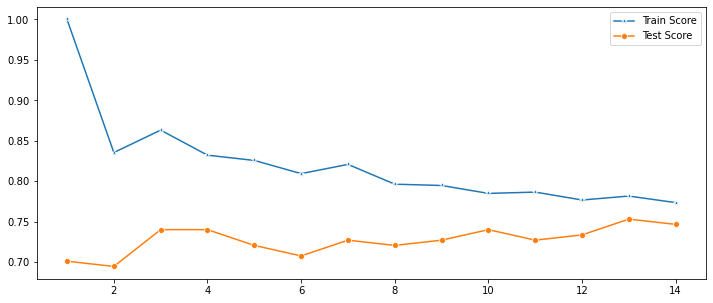

In [ ]:
plt.figure(figsize=(12,5))

# plotting the training score
p = sns.lineplot(x = range(1,15),y = train_scores,marker='*',label='Train Score')

# plotting the testing score
p = sns.lineplot(x = range(1,15),y = test_scores,marker='o',label='Test Score')

In [ ]:
# The best result is captured for k = 13

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7532467532467533

**CONFUSTION MATRIX**

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred_ = knn.predict(x_test)
confusion_matrix(y_test,y_pred_)
pd.crosstab(y_test, y_pred_, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,90,9,99
1,29,26,55
All,119,35,154


Text(0.5, 15.0, 'Predicted label')

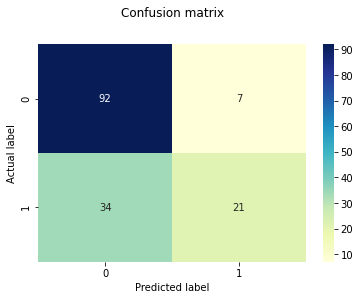

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')